In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import mglearn
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']= False

데이터 셋

X.shape (26, 2)


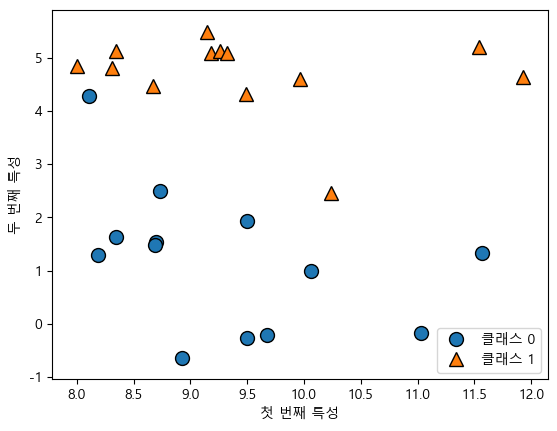

In [2]:
#이진 분류 데이터 셋
X,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape", X.shape)

Text(0.5, 0, '타깃')

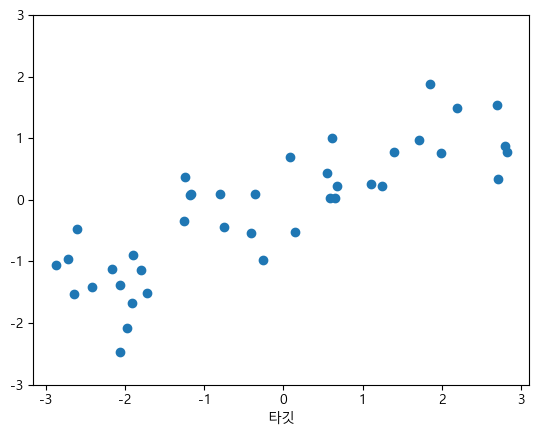

In [3]:
# 회귀 데이터 셋
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.xlabel("타깃")

In [4]:
# 유방암 데이터셋
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print("유방암 데이터의 형태", cancer.data.shape)

유방암 데이터의 형태 (569, 30)


In [6]:
print("클래스별 샘플 개수:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [7]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
# from sklearn.datasets import load_boston
# boston = load_boston
# print("데이터의 형태:", boston.data.shape)

# 보스턴 주택가격 데이터 셋
from sklearn.datasets import fetch_openml

boston = fetch_openml(name='boston')
data, target = boston.data, boston.target

print(data.shape)    # Prints the shape of the data
print(target.shape)  # Prints the shape of the target

(506, 13)
(506,)


C:\Users\kke86\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\datasets\_openml.py:303: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
C:\Users\kke86\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


KNN(K-최근접 이웃)

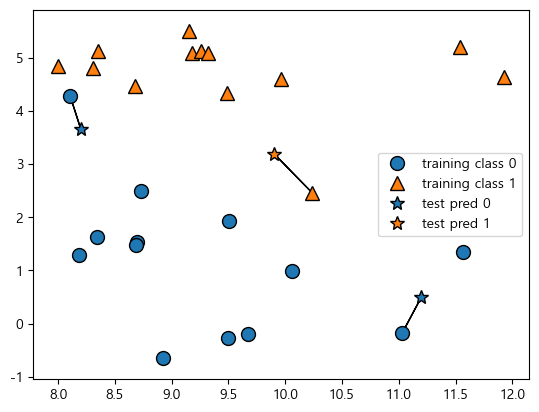

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

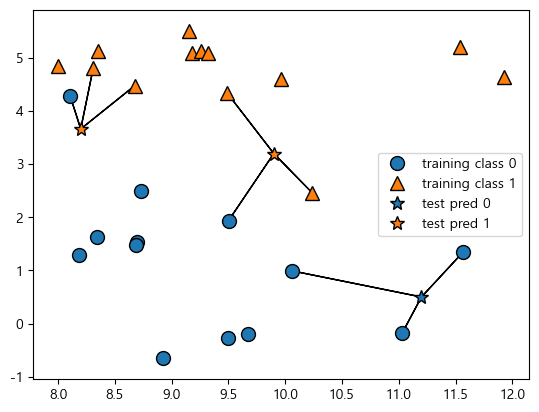

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X,y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [13]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


KNeighborsClassifier 분석

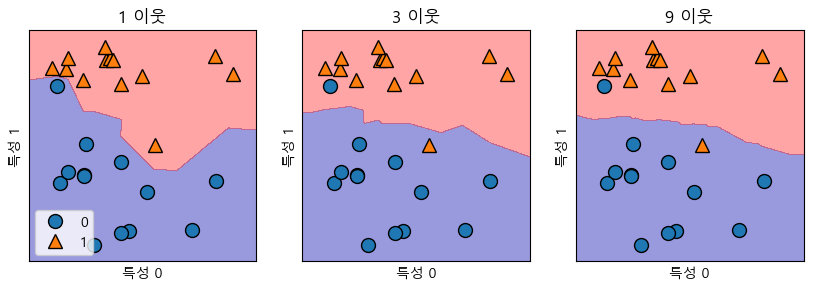

In [14]:
fig, axes = plt.subplots(1, 3,figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):        # 이웃이 1,3,9 일 때 결정 경계
    # fit 메소드는 self 오브젝트를 리턴
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있음
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)   
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃". format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)    

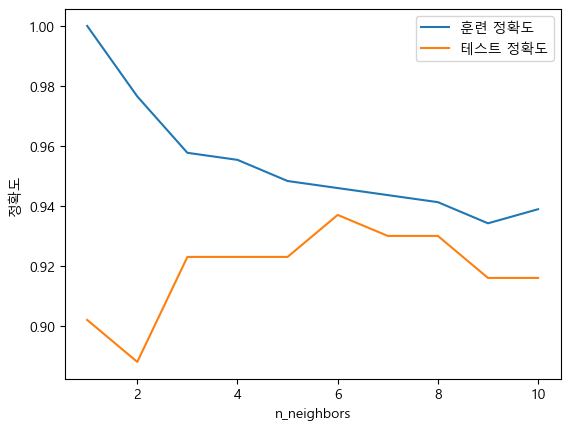

In [15]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state = 66)

training_accuracy= []
test_accuracy = []
# 1에서 10까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    #모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    #일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")    
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")   
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

K-최근접 이웃 회귀

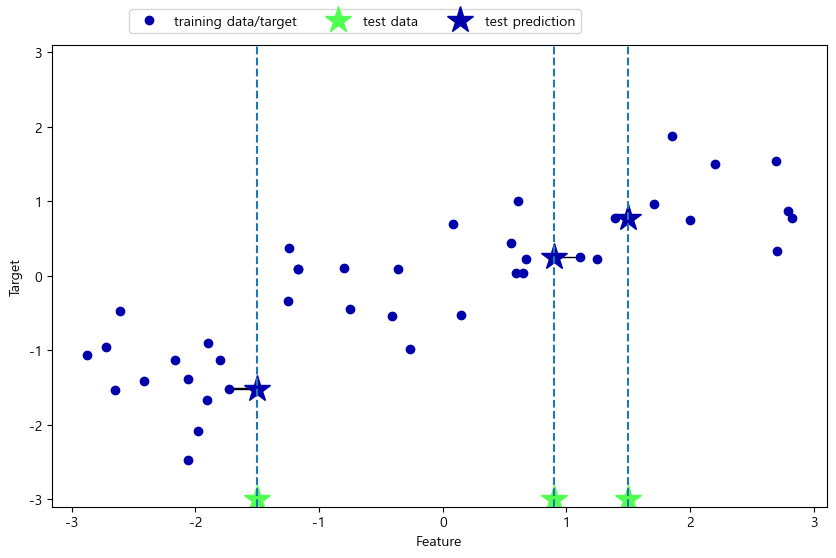

In [16]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

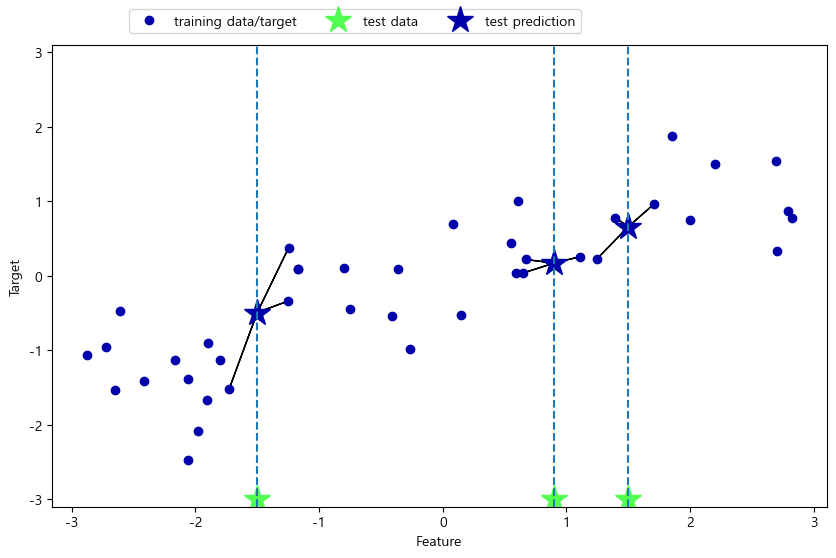

In [17]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [18]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
 
 # 이웃의 수를 3으로 하여 모델의 객체 만들기
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [19]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [20]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


KNeighborsRegrssor 분석

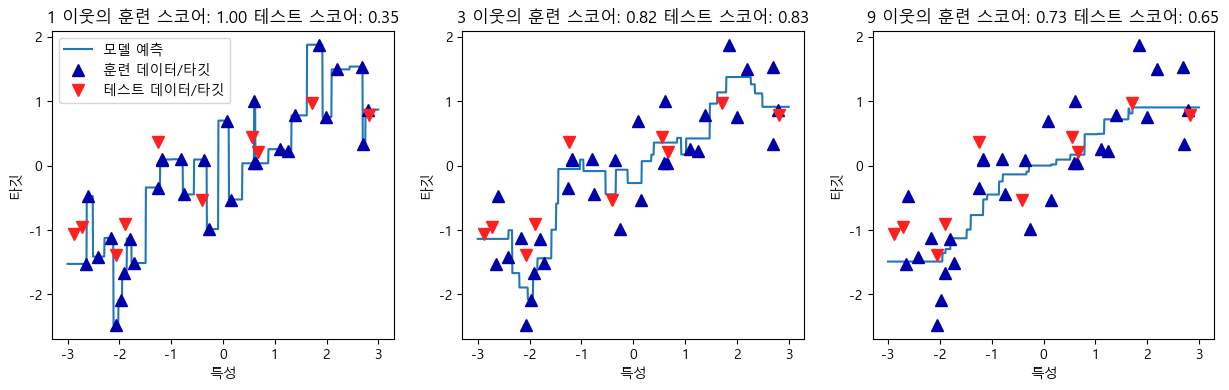

In [22]:
fig, axes = plt.subplots(1, 3,figsize=(15, 4))
# -3과 3 사이에 1,000 개의 데이터 포인트를 만듬
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):        # 1, 3, 8 이웃을 사용한 예측
    # fit 메소드는 self 오브젝트를 리턴
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있음
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))   
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)  
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)  

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측","훈련 데이터/타깃",
                 "테스트 데이터/타깃"], loc="best")   

이웃을 하나만 사용할 때는 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 커서 예측값이 훈련 데이터 포인트를 모두 지나감. 

이는 매우 불안정한 예측을 만들어냄. 이웃을 많이 사용하면 훈련 데이터에는 잘 안 맞을 수 있지만 더 안정된 예측가능